In [1]:
! git pull

analysis.ipynb	eval.csv	hodf.csv	 workload1
child.csv	eval.py		hodf_parent.csv  workload1.c
combined1G.csv	hodf_child.csv	runs


In [2]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
qemu_path = os.getenv('MOD_QEMU')

# identify the main run parent directory to use
rundir = f'{qemu_path}/evals/runs/run1G'


In [4]:
def get_avg_duration(size):
    durations = []
    # empty df
    events = pd.DataFrame()
    for i in range(1,11):
        df = pd.read_csv(f'{qemu_path}/evals/runs/run{size}G/run{i}.csv')
        events = df.iloc[:,2]
        
        df = df.iloc[:,-1]
        durations.append(df)

    # create a new dataframe with the average of the last column of all the csv files
    df = pd.concat(durations, axis=1).mean(axis=1)
    # print(df.to_string(index=False))
    # print(events.to_string(index=False))
    # combine df and events
    df = pd.concat([events, df], axis=1)
    df.columns = ['event', 'duration']
    return df

In [14]:
df1 = get_avg_duration(1)
df2 = get_avg_duration(2)
df3 = get_avg_duration(3)
df4 = get_avg_duration(4)
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)

df

,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000,0.000,0.000,0.000
1,Starting parent,102.374,102.976,102.115,101.509
2,Started wait for iothread lock,0.460,0.497,0.463,0.452
3,Acquired iothread lock,0.096,0.056,0.024,0.027
4,Starting child,0.104,0.103,0.079,0.140
5,HMP done in parent,0.226,0.188,0.166,0.224
6,Restored threads,0.676,0.473,0.538,0.401
7,Started wait for iothread lock,1.007,0.806,0.951,0.659
8,Acquired iothread lock,0.084,0.306,0.632,0.467
9,Got the socket conn CHILD,418.695,414.188,440.942,446.526


<AxesSubplot:xlabel='Ram Size', ylabel='Duration(ms)'>

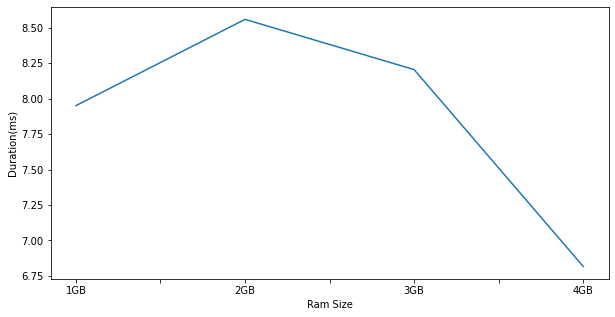

In [18]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

df.iloc[16,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5))

